In [2]:
import os
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from fancyimpute import KNN
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ajay\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
os.chdir(os.curdir)

In [4]:
df = pd.read_csv("train_cab.csv")

#Load test set and apply same feature engineering techniques parallely
test = pd.read_csv("test.csv")

In [5]:
#save pickup_datetime of test for results
test_pickup_datetime = test["pickup_datetime"]

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
df.shape

(16067, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [11]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [12]:
df.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [13]:
df.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

# Exploratory Analysis

In [14]:
#Convert fare_amount from object to numeric
df["fare_amount"] = pd.to_numeric(df["fare_amount"],errors = "coerce")

In [15]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [16]:
#remove rows having fractional passenger count and 0 count and greater than 10 passengers
df = df[df["passenger_count"] > 0]
df = df[df["passenger_count"] <= 10]
df = df[df["passenger_count"] % 1 == 0]

In [17]:
df.shape

(15933, 7)

In [18]:
df.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [19]:
df.shape

(15933, 7)

In [20]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"],errors = "coerce")

#Apply same for test set
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],errors = "coerce")

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [22]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [23]:
df["pickup_hour"] = pd.Categorical(df["pickup_datetime"].dt.strftime("%H"))
df["pickup_month"] = pd.Categorical(df["pickup_datetime"].dt.strftime("%m"))
df["pickup_weekday"] = pd.Categorical(df["pickup_datetime"].dt.strftime("%u"))
df["pickup_year"] = pd.Categorical(df["pickup_datetime"].dt.strftime("%Y"))

#Add same features to test
test["pickup_hour"] = pd.Categorical(test["pickup_datetime"].dt.strftime("%H"))
test["pickup_month"] = pd.Categorical(test["pickup_datetime"].dt.strftime("%m"))
test["pickup_weekday"] = pd.Categorical(test["pickup_datetime"].dt.strftime("%u"))
test["pickup_year"] = pd.Categorical(test["pickup_datetime"].dt.strftime("%Y"))

In [24]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,17,06,1,2009
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,16,01,2,2010
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,00,08,4,2011
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,04,04,6,2012
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,07,03,2,2010


In [25]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15909.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000
mean,15.059584,-72.468617,39.917943,-72.458874,39.895855,1.649658
std,432.255921,10.559654,6.825582,10.587461,6.196463,1.265933
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992148,40.734938,-73.991182,40.734662,1.000000
50%,8.500000,-73.981675,40.752633,-73.980155,40.753565,1.000000
75%,12.500000,-73.966800,40.767392,-73.963598,40.768026,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [26]:
#drop pickup_datetime
df.drop(["pickup_datetime"],axis = 1,inplace = True)

#drop from test set
test.drop(["pickup_datetime"],axis = 1,inplace = True)

In [27]:
test.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_hour          0
pickup_month         0
pickup_weekday       0
pickup_year          0
dtype: int64

In [28]:
df.isnull().sum()

fare_amount          24
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_hour           0
pickup_month          0
pickup_weekday        0
pickup_year           0
dtype: int64

In [29]:
df = df.reset_index(drop=True)

# Missing value analysis

In [30]:
missing_values = pd.DataFrame(df.isnull().sum()).reset_index()

In [31]:
missing_values

,index,0
0,fare_amount,24
1,pickup_longitude,0
2,pickup_latitude,0
3,dropoff_longitude,0
4,dropoff_latitude,0
5,passenger_count,0
6,pickup_hour,0
7,pickup_month,0
8,pickup_weekday,0
9,pickup_year,0


In [32]:
missing_values = missing_values.rename(columns = {"index":"Variables",0:"Missing_values"})

In [33]:
missing_values = missing_values.sort_values("Missing_values",ascending = False)

In [34]:
missing_values

,Variables,Missing_values
0,fare_amount,24
1,pickup_longitude,0
2,pickup_latitude,0
3,dropoff_longitude,0
4,dropoff_latitude,0
5,passenger_count,0
6,pickup_hour,0
7,pickup_month,0
8,pickup_weekday,0
9,pickup_year,0


In [35]:
#df['fare_amount'][0] = np.nan

In [36]:
#Impute with median
#df['fare_amount'] = df['fare_amount'].fillna(df['fare_amount'].median())

In [37]:
#df['fare_amount'][0]  #4.5

In [38]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15909.000000,15933.000000,15933.000000,15933.000000,15933.000000,15933.000000
mean,15.059584,-72.468617,39.917943,-72.458874,39.895855,1.649658
std,432.255921,10.559654,6.825582,10.587461,6.196463,1.265933
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992148,40.734938,-73.991182,40.734662,1.000000
50%,8.500000,-73.981675,40.752633,-73.980155,40.753565,1.000000
75%,12.500000,-73.966800,40.767392,-73.963598,40.768026,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [39]:
#replace NaT with NA to impute
for i in range(0, df.shape[1]):
    df.iloc[:,i] = df.iloc[:,i].replace("NaT", np.nan) 

In [40]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 2).fit_transform(df), columns = df.columns)

Imputing row 1/15933 with 0 missing, elapsed time: 110.931
Imputing row 101/15933 with 0 missing, elapsed time: 117.788
Imputing row 201/15933 with 0 missing, elapsed time: 117.791
Imputing row 301/15933 with 0 missing, elapsed time: 117.793
Imputing row 401/15933 with 0 missing, elapsed time: 117.794
Imputing row 501/15933 with 0 missing, elapsed time: 117.796
Imputing row 601/15933 with 0 missing, elapsed time: 117.797
Imputing row 701/15933 with 0 missing, elapsed time: 117.800
Imputing row 801/15933 with 0 missing, elapsed time: 117.803
Imputing row 901/15933 with 0 missing, elapsed time: 117.806
Imputing row 1001/15933 with 0 missing, elapsed time: 117.807
Imputing row 1101/15933 with 0 missing, elapsed time: 117.809
Imputing row 1201/15933 with 0 missing, elapsed time: 117.810
Imputing row 1301/15933 with 0 missing, elapsed time: 117.976
Imputing row 1401/15933 with 0 missing, elapsed time: 117.978
Imputing row 1501/15933 with 0 missing, elapsed time: 117.978
Imputing row 1601/15

In [41]:
#remove rows having fare amount -ve
df = df[df["fare_amount"] > 0.0]

In [42]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,17.0,6.0,1.0,2009.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,1.0,2.0,2010.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,0.0,8.0,4.0,2011.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,4.0,6.0,2012.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,3.0,2.0,2010.0


In [43]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_hour          0
pickup_month         0
pickup_weekday       0
pickup_year          0
dtype: int64

In [44]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year
count,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000
mean,15.057689,-72.468247,39.917744,-72.458500,39.895652,1.649633,13.493608,6.263634,4.033870,2011.731842
std,431.984417,10.560954,6.826427,10.588764,6.197228,1.265923,6.522473,3.446568,1.968566,1.867333
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,0.000000,1.000000,1.000000,2009.000000
25%,6.000000,-73.992145,40.734942,-73.991180,40.734700,1.000000,9.000000,3.000000,2.000000,2010.000000
50%,8.500000,-73.981673,40.752640,-73.980153,40.753574,1.000000,14.000000,6.000000,4.000000,2012.000000
75%,12.500000,-73.966800,40.767404,-73.963598,40.768028,2.000000,19.000000,9.000000,6.000000,2013.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000,23.000000,12.000000,7.000000,2015.000000


# Feature engineering

In [45]:
def haversine(long1,lat1,long2,lat2):
    phi1 = np.deg2rad(lat1)
    phi2 = np.deg2rad(lat2)
    delphi = np.deg2rad(lat2 - lat1)
    dellamda = np.deg2rad(long2 - long1)
  
    a = np.sin(delphi/2) * np.sin(delphi/2) + np.cos(phi1) * np.cos(phi2) * np.sin(dellamda/2) * np.sin(dellamda/2)
  
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    R = 6371
    return R * c

In [46]:
df["dist"] = haversine(df["pickup_longitude"],df["pickup_latitude"],df["dropoff_longitude"],df["dropoff_latitude"])

#Add for test set
test["dist"] = haversine(test["pickup_longitude"],test["pickup_latitude"],test["dropoff_longitude"],test["dropoff_latitude"])

In [47]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year,dist
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,17.0,6.0,1.0,2009.0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,1.0,2.0,2010.0,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,0.0,8.0,4.0,2011.0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,4.0,6.0,2012.0,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,3.0,2.0,2010.0,1.999157


In [48]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis = 1,inplace = True)

#drop from test set
test.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis = 1,inplace = True)

In [49]:
df.head()

,fare_amount,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year,dist
0,4.5,1.0,17.0,6.0,1.0,2009.0,1.030764
1,16.9,1.0,16.0,1.0,2.0,2010.0,8.450134
2,5.7,2.0,0.0,8.0,4.0,2011.0,1.389525
3,7.7,1.0,4.0,4.0,6.0,2012.0,2.799270
4,5.3,1.0,7.0,3.0,2.0,2010.0,1.999157


In [50]:
df = df.iloc[:,[1,2,3,4,5,6,0]]

In [51]:
df.head()

,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year,dist,fare_amount
0,1.0,17.0,6.0,1.0,2009.0,1.030764,4.5
1,1.0,16.0,1.0,2.0,2010.0,8.450134,16.9
2,2.0,0.0,8.0,4.0,2011.0,1.389525,5.7
3,1.0,4.0,4.0,6.0,2012.0,2.799270,7.7
4,1.0,7.0,3.0,2.0,2010.0,1.999157,5.3


In [52]:
df.describe()

,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year,dist,fare_amount
count,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000,15929.000000
mean,1.649633,13.493608,6.263634,4.033870,2011.731842,15.052597,15.057689
std,1.265923,6.522473,3.446568,1.968566,1.867333,311.468509,431.984417
min,1.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.010000
25%,1.000000,9.000000,3.000000,2.000000,2010.000000,1.214832,6.000000
50%,1.000000,14.000000,6.000000,4.000000,2012.000000,2.125955,8.500000
75%,2.000000,19.000000,9.000000,6.000000,2013.000000,3.855249,12.500000
max,6.000000,23.000000,12.000000,7.000000,2015.000000,8667.542104,54343.000000


In [53]:
#remove rows having distance 0
df = df[df["dist"] != 0]

In [54]:
df.shape

(15473, 7)

In [55]:
df.describe()

,passenger_count,pickup_hour,pickup_month,pickup_weekday,pickup_year,dist,fare_amount
count,15473.000000,15473.000000,15473.000000,15473.000000,15473.000000,15473.000000,15473.000000
mean,1.651781,13.500206,6.270370,4.035902,2011.740484,15.496207,15.167526
std,1.267631,6.510472,3.446388,1.969508,1.871195,316.014195,438.296414
min,1.000000,0.000000,1.000000,1.000000,2009.000000,0.000111,0.010000
25%,1.000000,9.000000,3.000000,2.000000,2010.000000,1.278201,6.000000
50%,1.000000,14.000000,6.000000,4.000000,2012.000000,2.196146,8.500000
75%,2.000000,19.000000,9.000000,6.000000,2013.000000,3.949361,12.500000
max,6.000000,23.000000,12.000000,7.000000,2015.000000,8667.542104,54343.000000


# Outlier analysis

In [56]:
cnames = ["dist","fare_amount"]

In [57]:
q25 = np.percentile(df["dist"],25)

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


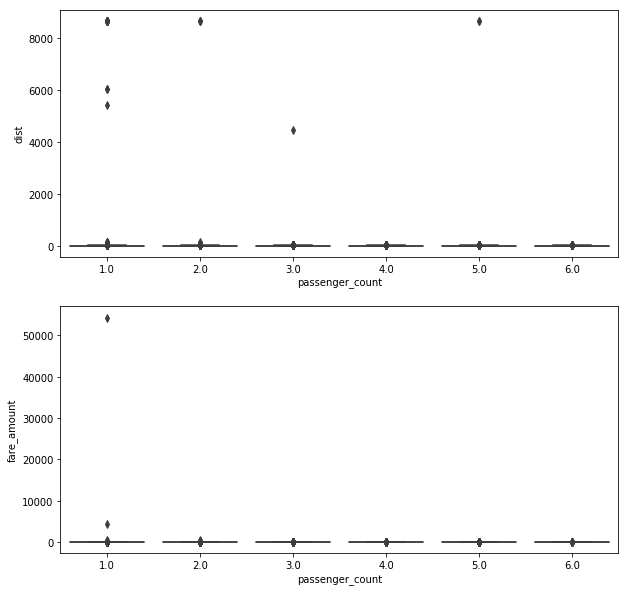

In [58]:
fig,ax = plt.subplots(2,figsize = (10,10))
for i in range(0,len(cnames)):
    print(sns.boxplot(y=cnames[i],x="passenger_count",data=df,ax=ax[i]))

In [59]:
for i in cnames:
    q75 = np.percentile(df[i],75)
    q25 = np.percentile(df[i],25)
    iqr = q75 - q25
    maximum = q75 + (1.5 * iqr)
    minimum = q25 - (1.5 * iqr)
    
    df.loc[df[i] > maximum,i] = np.NaN
    df.loc[df[i] < minimum,i] = np.NAN

In [60]:
#missing values
df.isnull().sum()

passenger_count       0
pickup_hour           0
pickup_month          0
pickup_weekday        0
pickup_year           0
dist               1351
fare_amount        1349
dtype: int64

In [61]:
df = pd.DataFrame(KNN(k=2).fit_transform(df),columns = df.columns)

Imputing row 1/15473 with 0 missing, elapsed time: 71.238
Imputing row 101/15473 with 0 missing, elapsed time: 72.508
Imputing row 201/15473 with 0 missing, elapsed time: 72.517
Imputing row 301/15473 with 0 missing, elapsed time: 72.524
Imputing row 401/15473 with 0 missing, elapsed time: 72.529
Imputing row 501/15473 with 1 missing, elapsed time: 72.536
Imputing row 601/15473 with 0 missing, elapsed time: 72.541
Imputing row 701/15473 with 2 missing, elapsed time: 72.549
Imputing row 801/15473 with 0 missing, elapsed time: 72.557
Imputing row 901/15473 with 0 missing, elapsed time: 72.559
Imputing row 1001/15473 with 0 missing, elapsed time: 72.565
Imputing row 1101/15473 with 0 missing, elapsed time: 72.570
Imputing row 1201/15473 with 0 missing, elapsed time: 72.576
Imputing row 1301/15473 with 0 missing, elapsed time: 72.581
Imputing row 1401/15473 with 0 missing, elapsed time: 72.589
Imputing row 1501/15473 with 0 missing, elapsed time: 72.594
Imputing row 1601/15473 with 0 missi

(array([2.000e+00, 1.016e+03, 4.446e+03, 3.325e+03, 2.767e+03, 1.418e+03,
       9.290e+02, 7.600e+02, 4.550e+02, 3.550e+02]), array([1.0000e-02, 2.2190e+00, 4.4280e+00, 6.6370e+00, 8.8460e+00,
       1.1055e+01, 1.3264e+01, 1.5473e+01, 1.7682e+01, 1.9891e+01,
       2.2100e+01]), <a list of 10 Patch objects>)


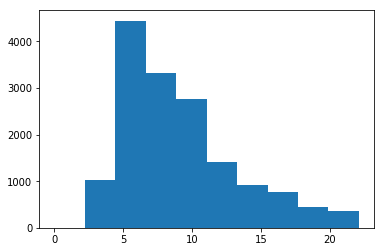

In [62]:
print(plt.hist(df.fare_amount))

# Feature selection

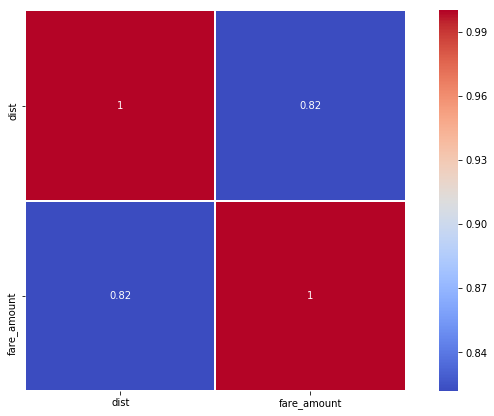

In [63]:
df_corr = df.loc[:,cnames]

#Set the width and height of the plot
f, ax = plt.subplots(figsize=(12, 7))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='coolwarm',square = True,linewidths = 1,ax=ax,annot =True)

In [64]:
#ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
model = ols('fare_amount ~ C(pickup_hour) + C(pickup_weekday) + C(pickup_month) + C(pickup_year) + C(passenger_count)',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(model)
aov_table
#aov_table.summary()

,df,sum_sq,mean_sq,F,PR(>F)
C(pickup_hour),24.0,2119.096101,88.295671,5.255159,9.259588e-16
C(pickup_weekday),7.0,145.267754,20.752536,1.235144,2.791590e-01
C(pickup_month),12.0,683.774301,56.981192,3.391392,5.592447e-05
C(pickup_year),7.0,7353.415518,1050.487931,62.522671,3.897922e-89
C(passenger_count),5.0,174.196960,34.839392,2.073562,6.552123e-02
Residual,15420.0,259082.401910,16.801712,NaN,NaN


In [65]:
#remove pickup_weekday
df.drop(["pickup_weekday"],axis = 1,inplace = True)

#drop from test set
test.drop(["pickup_weekday"],axis = 1,inplace = True)

In [66]:
test.head()

,passenger_count,pickup_hour,pickup_month,pickup_year,dist
0,1,13,01,2015,2.323259
1,1,13,01,2015,2.425353
2,1,11,10,2011,0.618628
3,1,21,12,2012,1.961033
4,1,21,12,2012,5.387301


# Sampling

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df.values[:,:-1]
Y = df.values[:,-1]

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size = 0.8,random_state = 1000)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Model Selection

In [70]:
# import Error metric
from sklearn import metrics
def mape(y_test,pred):
    return np.mean(np.abs((y_test-pred)/y_test))

def rms(ytrue,yhat):
    mse = metrics.mean_squared_error(ytrue,yhat)
    return np.sqrt(mse)

## Linear regression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model_lm = LinearRegression()

In [73]:
model_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
pred_lm = model_lm.predict(X_test)

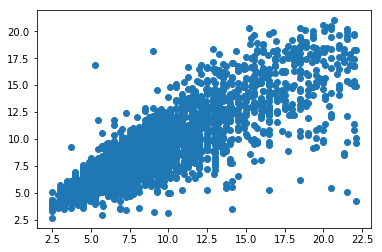

In [75]:
plt.scatter(y_test,pred_lm)

C:\Users\Ajay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


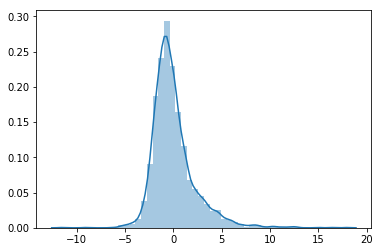

In [76]:
sns.distplot(y_test-pred_lm)

In [77]:
mse = metrics.mean_squared_error(y_test,pred_lm)
rms_lm = np.sqrt(mse)
rms_lm

2.2449881997022745

In [78]:
mape_lm = mape(y_test,pred_lm)
mape_lm

0.18643852852394138

## Random forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 500)

In [80]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [81]:
pred_rf = model_rf.predict(X_test)

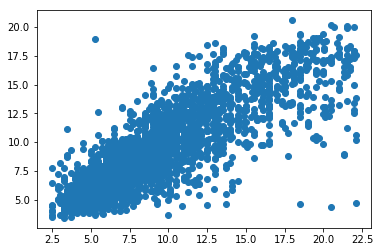

In [82]:
plt.scatter(y_test,pred_rf)

C:\Users\Ajay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


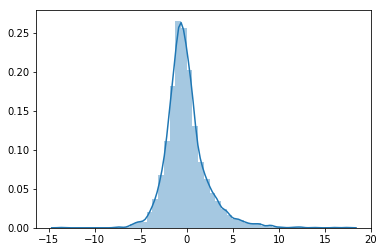

In [83]:
sns.distplot((y_test - pred_rf))

In [84]:
mse = metrics.mean_squared_error(y_test,pred_rf)
rms_rf = np.sqrt(mse)
rms_rf

2.257505219145407

In [85]:
mape_rf = mape(y_test,pred_rf)
mape_rf

0.1918321967187326

## Boosting

### Gradient boosting

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
model_gbm = GradientBoostingRegressor(n_estimators = 120)

In [88]:
model_gbm.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [89]:
pred_gbm = model_gbm.predict(X_test)

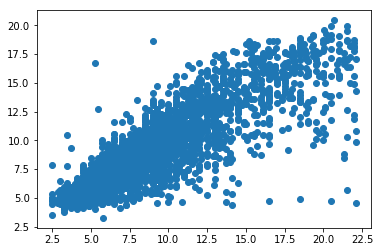

In [90]:
plt.scatter(y_test,pred_gbm)

C:\Users\Ajay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


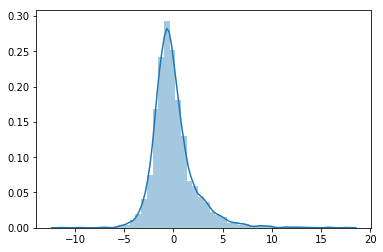

In [91]:
sns.distplot(y_test-pred_gbm)

In [92]:
mse = metrics.mean_squared_error(y_test,pred_gbm)
rms_gbm = np.sqrt(mse)
rms_gbm

2.1778772435289664

In [93]:
mape_gbm = mape(y_test,pred_gbm)
mape_gbm

0.17863350711248496

### XGBoost

In [94]:
from xgboost import XGBRegressor

In [95]:
model_xgb = XGBRegressor()

In [96]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [97]:
pred_xgb = model_xgb.predict(X_test)

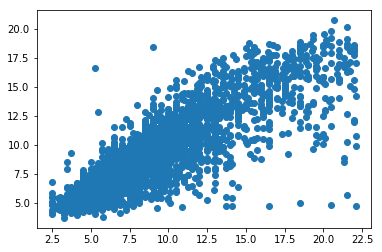

In [98]:
plt.scatter(y_test,pred_xgb)

C:\Users\Ajay\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


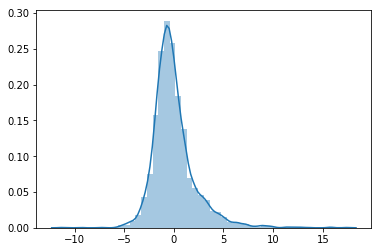

In [99]:
sns.distplot(y_test-pred_xgb)

In [100]:
rms_xgb = rms(y_test,pred_xgb)
rms_xgb

2.1734134326784598

In [101]:
mape_xgb = mape(y_test,pred_xgb)
mape_xgb

0.17839489762020352

In [102]:
rms_xgb,rms_gbm,rms_rf,rms_lm

(2.1734134326784598, 2.1778772435289664, 2.257505219145407, 2.2449881997022745)

In [103]:
mape_xgb,mape_gbm,mape_rf

(0.17839489762020352, 0.17863350711248496, 0.1918321967187326)

## Prediction on test set
As GBM and XGBoost produces better results than other models. We will train whole train data and predict on test data

## Apply XGBoost

In [104]:
model_xgb2 = XGBRegressor()

In [105]:
model_xgb2.fit(X,Y)

C:\Users\Ajay\Anaconda3\lib\site-packages\xgboost\core.py:614: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase memory consumption")


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [106]:
pred_xgb2 = model_xgb2.predict(test.values)

In [107]:
pred_results_xgb2 = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"prediction" : pred_xgb2})

In [108]:
pred_results_xgb2.to_csv("predictions_xgboost.csv",index=False)

## Apply GBM

In [109]:
model_gbm2 = GradientBoostingRegressor(n_estimators = 120)

In [110]:
model_gbm2.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [111]:
pred_gbm2 = model_gbm2.predict(test.values)

In [112]:
pred_results_gbm2 = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"prediction" : pred_gbm2})

In [113]:
pred_results_gbm2.to_csv("predictions_gbm.csv",index = False)